Isomap has so many real-world use cases. The most straightforward of which being whenever you believe a simpler surface can describe and preserve the inherent structure of your higher dimensionality dataset, and want to retrieve that simpler embedding.

Isomap is better than linear methods when dealing with almost all types of real image and motion tracking.

Another area isomap tends excel at is the grouping and identifying of similar variations in similar data samples. Due to this, it is extremely useful as a preprocessor step before conducting supervised learning tasks, such as classification or regression. Even the official example of isomap in SciKit-Learn's documentation is of it being applied to group similar variations of handwritten digits, and outperforming PCA while doing so!

In this code we will use a dataset that consists of 698 samples of 4096-dimensional vectors. These vectors are the coded brightness values of 64x64-pixel heads that have been rendered facing various directions and lighted from many angles.

We begin with first be applying both PCA and Isomap to these 698 raw images to derive 2D principal components and a 2D embedding of the data's intrinsic geometric structure. We then project both onto a 2D scatter plot, with a few superimposed face images on the associated samples. We then increase the n_components value and change it to three, and plot a scatter plot on a 3D chart.

In [1]:
import pandas as pd
import numpy as np
import scipy.io
import random, math
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import manifold

In [2]:
def Plot2D(T, title, x, y, num_to_plot=40):
    # This method picks a bunch of random images to plot onto the chart
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    
    # For resizing the images to be shown
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    
    # For plotting the resized images after reshaping and adjusting the limits in the graph
    for i in range(num_to_plot):
        img_num = int(random.random() * num_images)
        x0, y0 = T[img_num,x]-x_size/2., T[img_num,y]-y_size/2.
        x1, y1 = T[img_num,x]+x_size/2., T[img_num,y]+y_size/2.
        img = df.iloc[img_num,:].values.reshape(num_pixels, num_pixels)
        ax.imshow(img, aspect='auto', cmap=plt.cm.gray, interpolation='nearest', zorder=100000, extent=(x0, x1, y0, y1))

    # Plotting the full 2D scatter plot
    ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

In [3]:
def Plot3D(T, title, x, y, z):
    # This method picks a bunch of random images to plot onto the chart:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    ax.set_zlabel('Component: {0}'.format(z))
    # Plotting the 3D full scatter plot
    ax.scatter(T[:,x],T[:,y], T[:,z], marker='.',alpha=0.7)

In [4]:
# importing .mat files
mat = scipy.io.loadmat('Datasets\\face_data.mat')
df = pd.DataFrame(mat['images']).T
num_images, num_pixels = df.shape
num_pixels = int(math.sqrt(num_pixels))
print(df.shape, num_images, num_pixels)

(698, 4096) 698 64


In [5]:
# Rotating the pictures
for i in range(num_images):
    df.loc[i,:] = df.loc[i,:].values.reshape(num_pixels, num_pixels).T.reshape(-1)  
print(df.shape)

(698, 4096)


(698, 3)


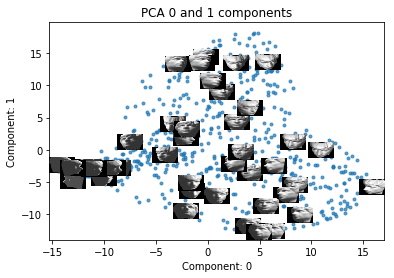

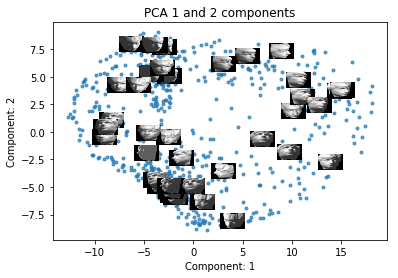

In [6]:
#
# Implementing PCA here
#
pca = PCA(n_components = 3)
pca.fit(df)
T = pca.transform(df)
print(T.shape)
Plot2D(T, 'PCA 0 and 1 components', 0, 1)
Plot2D(T, 'PCA 1 and 2 components', 1, 2)

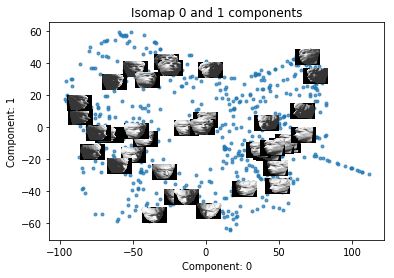

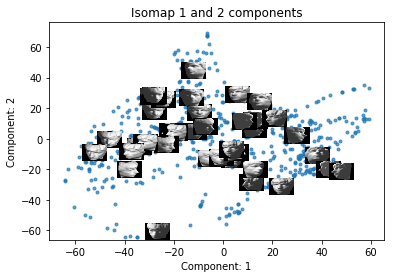

In [7]:
#
# Implementing Isomap here

iso = manifold.Isomap(n_components = 3, n_neighbors = 3)
iso.fit(df)
manifold = iso.transform(df)

Plot2D(manifold, 'Isomap 0 and 1 components', 0, 1)
Plot2D(manifold, 'Isomap 1 and 2 components', 1, 2)

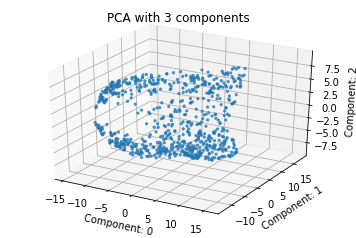

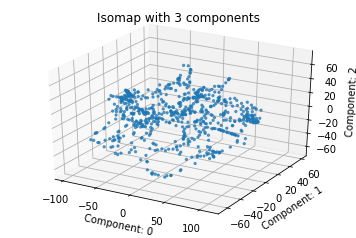

In [8]:
#
# Plotting in 3D

Plot3D(T, title = "PCA with 3 components", x =0, y = 1, z=2)
Plot3D(manifold, title = "Isomap with 3 components", x=0, y=1, z=2)

plt.show()